# Line graphs

[Svensk version](../linecharts_sv.html) | [Front page](index_en.html)

Line charts are used to show different values of a variable, when the observations are connected somehow. For instance change of some variable in a country, over time. Line charts are easy to understand and seldom require any further explanation, which makes them attractive from a pedagogical point of view.

We will here make a graph with the aid of the QoG Basic time series data. It holds information about the countries of the world, over time. The unit of analysis is country-year. Each country has an observation for each year. First, we load the data directly from the QoG web page:

In [1]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta"

(Quality of Government Basic dataset 2018 - Time-Series)


Our graph will show the development of GDP per capita in Sweden, with the help of the `twoway` command. The GDP variable is called "gle_rgdpc".

It is important to bear in mind that a simple line graph only shows the value of one observation per time unit. We will therefore need to filter out all observations that are not Sweden. We ould do it by deleting all other observations from the data. But since we might want them later, we instead do the filtering within the line graph command, with the aid of [if qualifiers](ifstatements_en.html).

The main structure of the command is that we write `twoway` to start the graph and then add the line graph in a layer of its own, delimited by parentheses. Within the parentheses we start with `line` and then the variable that we want on the Y axis ("gle_rgdpc") and then the variable we want on the X axis ("year"). Then we put in the if qualifier `if cname=="Sweden"`, which states that only observations on which the variable "cname" has the value "Sweden" are included. Then we end the parenthesis.

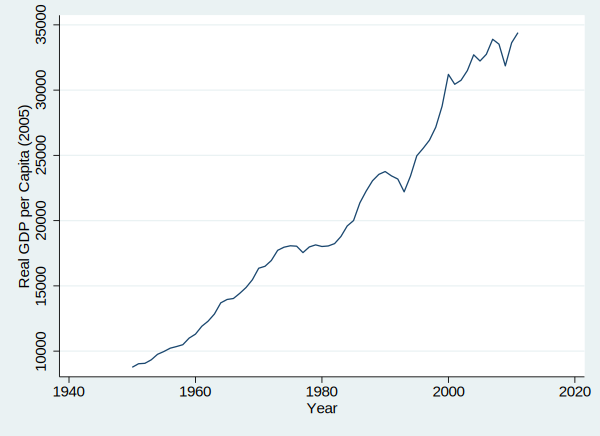

In [2]:
twoway (line gle_rgdpc year if cname=="Sweden")

Neat! We can see that GDP per capita has increased over time in Sweden, with some setbacks, like the big economic crisis in the 90's and the financial crisis 2009.

## A common error: Observations are in the wrong order
Sometimes when we make a line graph we get the following result:

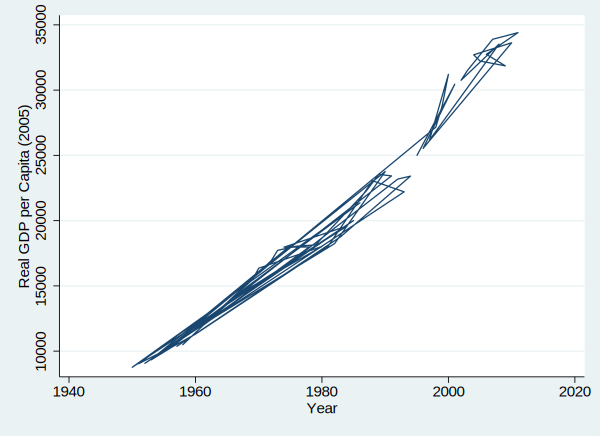

In [4]:
twoway (line gle_rgdpc year if cname=="Sweden")

The reason might then be that the observations - the rows - in the dataset have been scrambled. Stata draws the line in the order of the dataset, frmo top to bottom. It does not matter when we make scatterplots, but when we have a connection between the observations it is important.

We therefore need to sort the observations, in ascending order of the x axis variable. We can do this by writing `gsort cname year` to sort all observations first by country, and then by year. If we then redraw the graph we will get the proper result.

In [5]:
gsort cname year

## Add more lines

It is often useful to have several lines in one graph. We do that by adding more layers in the `twoway` command, with separate if qualifiers. In the graph below we add a line for Denmark - we just copy the parentheses for Sweden, change the country in the qualifier, and then add an option in each parentheses which governs the line color: blue for Sweden, red for Denmark. There are other options that govern the looks of the line, for instance `lpattern()` and `lwidth()`, but we will keep it simple here. See `help twoway line` for an exhaustive list.

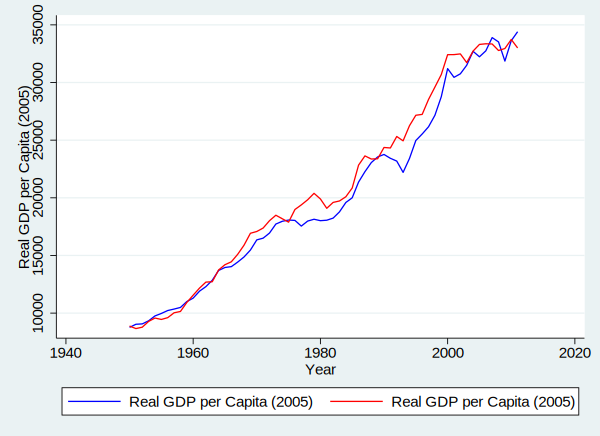

In [6]:
twoway (line gle_rgdpc year if cname=="Sweden", lcolor(blue)) (line gle_rgdpc year if cname=="Denmark", lcolor(red))

## Add reference lines

Finally, we might want to mark some special values on either the x or y axis. We can do so with the options `yline()` and `xline()`. They can also be used in all `twoway` graphs.

Importantly, these options should not be placed within the parentheses, since they apply to the entire graph. They should therefore be placed after all the parentheses.

First we add lines that show two important crises in the Swedish economy - the move to a floating exchange rate in 1992 and the financial crisis 2009, with the option `xline()`.

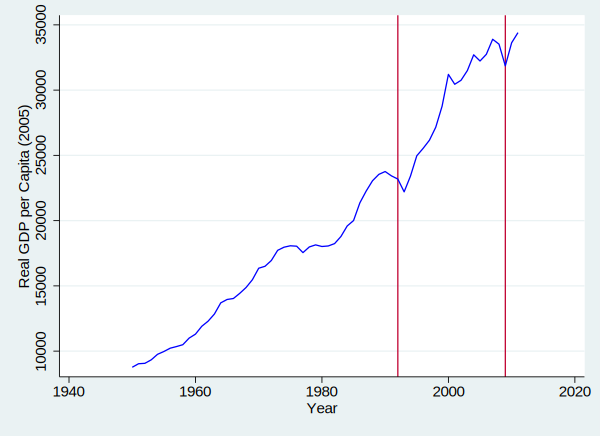

In [7]:
twoway (line gle_rgdpc year if cname=="Sweden", lcolor(blue)), xline(1992 2009)

Next we add a reference line on the Y axis, that marks 20000 dollars in GDP per capita, with the option `yline(20000)`. We can also use options within the yline parentheses to change the looks of that line.

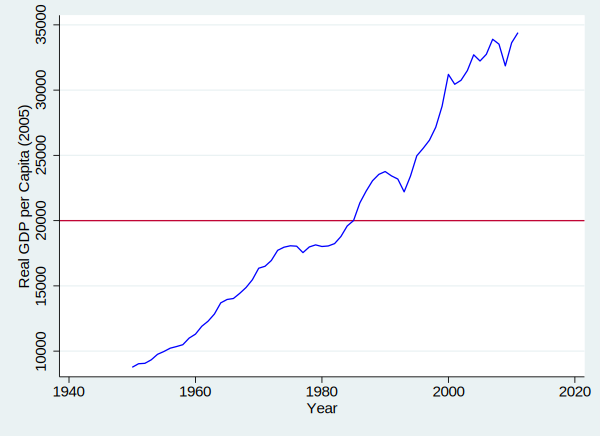

In [8]:
twoway (line gle_rgdpc year if cname=="Sweden", lcolor(blue)), yline(20000)

## Conclusion

Line graphs are simple and pedagogical, if we want to show how something has changed over time. But in order for it to work, we need to have data with only one value per unit of time. This can be arranged by deleting all other observations from the data first, or with the help of if qualifiers in the command itself.

And as we talked about above, more lines can be added to the same graph, but they then need to be in separate layers in the `twoway` command.